In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
%cd /content/drive/MyDrive/Colab Notebooks/exploratory-data-analysis---customer-loans-in-finance954

/content/drive/MyDrive/Colab Notebooks/exploratory-data-analysis---customer-loans-in-finance954


# Analysis and Visualisation



For accurate analysis, we use the original dataset for the actual values of money, which existed before we altered their values and distributions in the previous explroatory data analysis.

In [141]:
import sys
sys.path.insert(0, ".")

from pathlib import Path
import db_utils
import pandas as pd

db_utils

df = pd.read_csv('loan_payments.csv')
df

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,Mar-2014,0.00,NaN,May-2013,NaN,NaN,1,INDIVIDUAL


## Current State of the Loans




We will query the data to check the current state of the payments:

What percentage of the loans are recovered against the investor funding and the total amount funded?

We can visualise the results on a scatter graph.



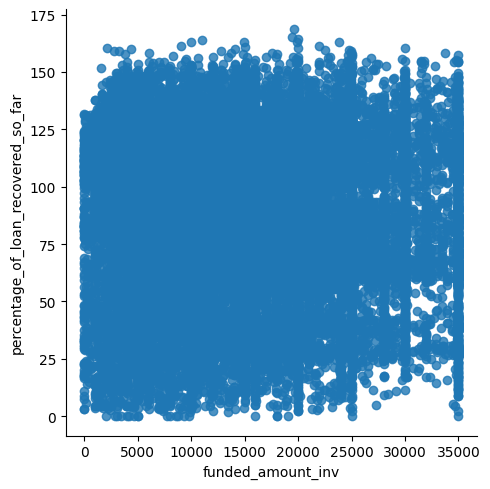

In [142]:
import seaborn as sns

# from Plotter import Plotter
# plotter_instance = Plotter()

# for each row in df:
#     percentage_of_loan_recovered_so_far = 100*total_payment/loan_amount
#     total_funded = funded_amount + funded_amount_inv

df['percentage_of_loan_recovered_so_far'] = 100*df.total_payment/df.loan_amount

# print('percentage_of_loan_recovered_so_far:')
# print(percentage_of_loan_recovered_so_far)

# plotter_instance.scattergraph(df, df.funded_amount , percentage_of_loan_recovered_so_far)


sns.lmplot(data=df, x='funded_amount_inv', y='percentage_of_loan_recovered_so_far')

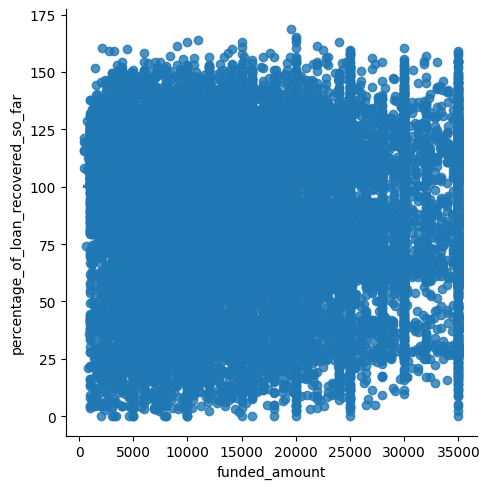

In [143]:
sns.lmplot(data=df, x='funded_amount', y='percentage_of_loan_recovered_so_far')

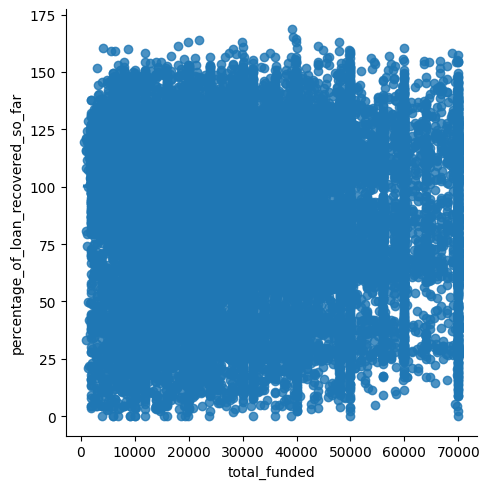

In [144]:
df['total_funded'] = df.funded_amount + df.funded_amount_inv

sns.lmplot(data=df, x='total_funded', y='percentage_of_loan_recovered_so_far')

We can also visualise what percentage of the total amount would be recovered up to 6 months' in the future:

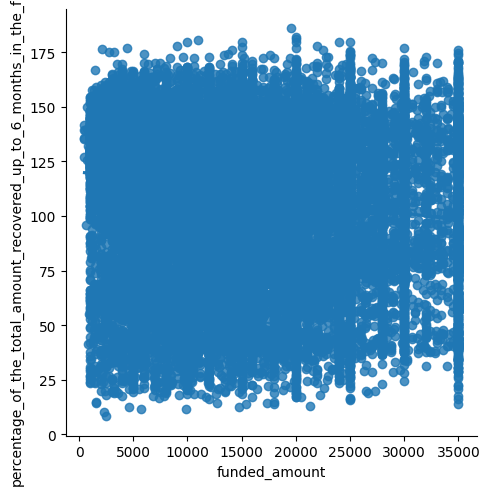

In [145]:
df['percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future'] = 100*(df.total_payment+df.instalment*6)/df.loan_amount

# plotter_instance.scattergraph(df.loan_amount, percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future)

sns.lmplot(data=df, x='funded_amount', y='percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future')


## Calculating Loss

The company wants to check what percentage of loans have been a loss to the company.

Loans marked as Charged Off in the loan_status column represent a loss to the company.

In [146]:
100*df['loan_status'].value_counts()['Charged Off']/df['id'].count()


10.272722243735133

Approximately 10% of loans have historically become Charged Off.

In [147]:
# createa mask of rows that have been charged-off
charged_off_index_list = df.index[df['loan_status'] == 'Charged Off']

# then find the sum of total_payment ofr thsoe rows
sum(df.total_payment[charged_off_index_list])

37400589.04081948

The total amount that was paid towards these loans before being charged off is 37,400,589

## Calculating Projected Loss

We can calculate the projected loss of the loans marked as Charged Off:

In [148]:
df.loan_amount - df.out_prncp

0         2470.30
1         4097.17
2        16000.00
3        15000.00
4         4702.53
           ...   
54226     5000.00
54227     5000.00
54228     3500.00
54229     5000.00
54230     5000.00
Length: 54231, dtype: float64

In [149]:
df.out_prncp[charged_off_index_list]

7        0.0
56       0.0
83       0.0
90       0.0
117      0.0
        ... 
54152    0.0
54156    0.0
54180    0.0
54194    0.0
54198    0.0
Name: out_prncp, Length: 5571, dtype: float64

In [150]:
df.loan_amount[charged_off_index_list]

7        26500
56       11200
83        1325
90        8150
117       7000
         ...  
54152     8000
54156     2125
54180     2500
54194     1000
54198    20000
Name: loan_amount, Length: 5571, dtype: int64

In [151]:
df.total_rec_prncp[charged_off_index_list]

7         1197.35
56         885.52
83         176.69
90        1045.20
117        321.84
           ...   
54152     5717.45
54156      943.58
54180     1730.83
54194      544.02
54198    16077.42
Name: total_rec_prncp, Length: 5571, dtype: float64

In [152]:
df.loan_amount[charged_off_index_list] - df.total_rec_prncp[charged_off_index_list]

7        25302.65
56       10314.48
83        1148.31
90        7104.80
117       6678.16
           ...   
54152     2282.55
54156     1181.42
54180      769.17
54194      455.98
54198     3922.58
Length: 5571, dtype: float64

In [153]:
df.loan_amount[charged_off_index_list] - df.total_payment[charged_off_index_list]

7        22317.730000
56        9293.490000
83        1042.220000
90        6341.950000
117       5345.860000
             ...     
54152      705.350000
54156     -455.248838
54180      413.370000
54194      296.050000
54198     -339.660000
Length: 5571, dtype: float64

We can changes the categrories of the term lengths into integers:

In [154]:
set(df.term)

{'36 months', '60 months', nan}

In [156]:
df['term'] = df['term'].astype(str)


df['term'] = df['term'].map(lambda x: x.rstrip(' months') if x != 'nan' else False)

df['term'] = df['term'].astype(int)

In [370]:

df['how_much_the_borrower_must_pay_in_total'] = df.term * df.instalment


In [158]:


df['amount_left_to_pay'] = df.how_much_the_borrower_must_pay_in_total[charged_off_index_list] - df.total_payment[charged_off_index_list]

sum(df.how_much_the_borrower_must_pay_in_total[charged_off_index_list] - df.total_payment[charged_off_index_list] - df.loan_amount[charged_off_index_list])


-19685805.08081952


The revenue that the Charged Off loans would have generated for the company if they had finished their term is 56,673,594

We can visualise the loss projected over the remaining term of these loans.

We transform the data into dates to make it easier to deal with as amounts of months.

In [159]:
from DataTransform import DataTransform
df_transforming_instance = DataTransform()

for column_name in ('issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'):
            df = df_transforming_instance.date_convert(df, column_name)

We can determine over what duration each borrower actually sent payments for their loan:

In [160]:

#  y-axis is
df['how_much_the_charged_off_borrower_must_pay_in_total'] = df.how_much_the_borrower_must_pay_in_total[charged_off_index_list]

# # # # # # # # # # # # # # # # # # # # # # # # # # # #

# print(df.last_payment_date - df.issue_date)

# f = pd.Timedelta(df.last_payment_date - df.issue_date).to_period('M')

# print(f)
df['actual_payment_duration'] = df.last_payment_date - df.issue_date


0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
54226   NaT
54227   NaT
54228   NaT
54229   NaT
54230   NaT
Name: actual_payment_duration, Length: 54231, dtype: timedelta64[ns]

In [161]:

df['actual_payment_duration'] = df.actual_payment_duration[charged_off_index_list]


0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
54226   NaT
54227   NaT
54228   NaT
54229   NaT
54230   NaT
Name: actual_payment_duration, Length: 54231, dtype: timedelta64[ns]

In [163]:

df['actual_payment_duration'] = df['actual_payment_duration'].astype(int)




# x-axis is
df['remaining_term_in_days'] = df.term*30 - df.actual_payment_duration

# (timedifference bwteen last_payment_date and issue_date)



# instalment * remainign term




In [167]:
df['charged_off_remaining_term_in_days'] = df['remaining_term_in_days'][charged_off_index_list]

We can visualise the loss projected over the remaining term of these loans:

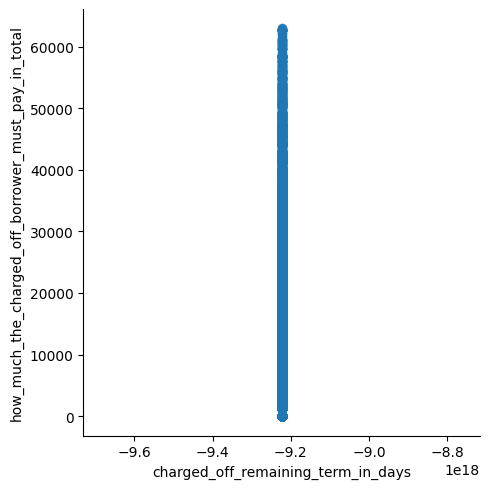

In [168]:

sns.lmplot(data=df, x='charged_off_remaining_term_in_days', y='how_much_the_charged_off_borrower_must_pay_in_total')

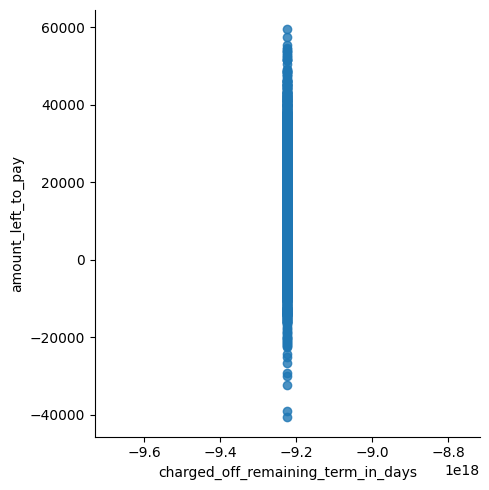

In [169]:

sns.lmplot(data=df, x='charged_off_remaining_term_in_days', y='amount_left_to_pay')

## Possible Loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.

What percentage do users in this bracket currently represent as a percentage of all loans?

CUstmers who are behind wth their loan payemtns are on a payment plan, but there is only one custoemr who is on a payment plan:

In [175]:
df['payment_plan'].value_counts()['y']

1

Customers who have 30+ days past-due payment(s) in their credit file for the past two years are struggling to pay off their loan:

In [177]:
df['has_past_due_payments'] = df['delinq_2yrs']>0




0         True
1        False
2        False
3        False
4        False
         ...  
54226     True
54227    False
54228    False
54229    False
54230    False
Name: has_past_due_payments, Length: 54231, dtype: bool

In [178]:

df['has_past_due_payments'].value_counts()[True]

late_payers_index_list = df.index[df['has_past_due_payments'] == True]

late_payers_index_list = list(late_payers_index_list)


[0,
 5,
 12,
 16,
 17,
 36,
 38,
 43,
 48,
 54,
 55,
 59,
 63,
 66,
 69,
 73,
 74,
 78,
 89,
 114,
 117,
 120,
 123,
 127,
 130,
 131,
 138,
 142,
 146,
 153,
 154,
 157,
 158,
 163,
 164,
 171,
 181,
 183,
 184,
 189,
 190,
 191,
 192,
 194,
 199,
 207,
 211,
 213,
 215,
 216,
 223,
 225,
 229,
 230,
 232,
 239,
 240,
 255,
 272,
 274,
 278,
 302,
 303,
 309,
 316,
 319,
 320,
 331,
 343,
 347,
 350,
 354,
 356,
 358,
 367,
 369,
 375,
 393,
 398,
 399,
 406,
 410,
 425,
 434,
 437,
 439,
 440,
 441,
 444,
 446,
 451,
 455,
 457,
 473,
 486,
 493,
 507,
 516,
 518,
 522,
 524,
 539,
 540,
 544,
 547,
 548,
 565,
 567,
 575,
 578,
 579,
 586,
 587,
 588,
 607,
 615,
 620,
 623,
 645,
 646,
 650,
 660,
 662,
 672,
 684,
 692,
 705,
 709,
 711,
 713,
 715,
 727,
 741,
 742,
 744,
 745,
 747,
 749,
 755,
 758,
 759,
 762,
 765,
 766,
 770,
 779,
 780,
 816,
 817,
 828,
 830,
 832,
 833,
 835,
 842,
 850,
 851,
 855,
 860,
 864,
 865,
 877,
 879,
 880,
 892,
 903,
 906,
 924,
 929,
 932,
 

In [179]:

100*df['has_past_due_payments'].value_counts()[True]/df['id'].count()

15.858088547140934

We can calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off.

In [180]:
df['has_past_due_payments'].value_counts()[True]

8600

There are 8600 customers strugglign to pay off theri loans.

w much loss would the company  incur if these borrowers' statuses were changed to Charged Off?

In [181]:
sum(df.how_much_the_borrower_must_pay_in_total[late_payers_index_list] - df.total_payment[late_payers_index_list])

39744819.77335135

The company would incur a loss of 96,418,414 if these borrowers' statuses were changed to Charged Off.

What is the projected loss of these loans if the customer were to finish the full loans term?

In [182]:
df['how_much_the_late_payer_borrower_must_pay_in_total'] = df.how_much_the_borrower_must_pay_in_total[late_payers_index_list]

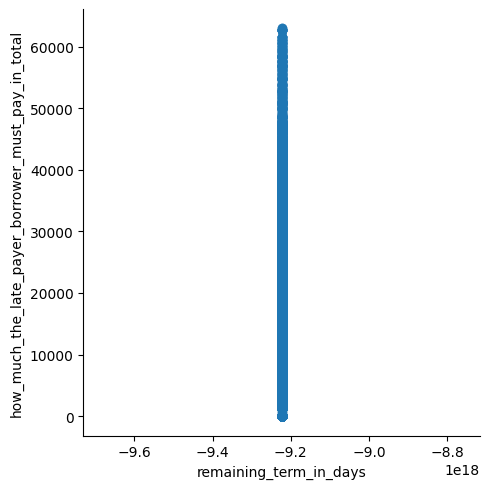

In [184]:

sns.lmplot(data=df, x='remaining_term_in_days', y='how_much_the_late_payer_borrower_must_pay_in_total')

If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?


In [186]:
charged_off_index_list = list(charged_off_index_list)

[7,
 56,
 83,
 90,
 117,
 138,
 149,
 190,
 209,
 314,
 336,
 362,
 395,
 431,
 502,
 558,
 564,
 577,
 590,
 613,
 634,
 708,
 744,
 789,
 807,
 824,
 835,
 866,
 871,
 874,
 897,
 949,
 959,
 967,
 984,
 1001,
 1057,
 1083,
 1092,
 1104,
 1195,
 1214,
 1217,
 1234,
 1252,
 1264,
 1301,
 1371,
 1404,
 1520,
 1526,
 1530,
 1569,
 1571,
 1607,
 1626,
 1628,
 1653,
 1658,
 1698,
 1745,
 1777,
 1820,
 1835,
 1842,
 1878,
 1909,
 1918,
 1960,
 1963,
 1994,
 2013,
 2027,
 2028,
 2052,
 2083,
 2143,
 2146,
 2152,
 2173,
 2214,
 2267,
 2274,
 2275,
 2301,
 2329,
 2365,
 2367,
 2420,
 2453,
 2483,
 2489,
 2508,
 2610,
 2642,
 2755,
 2759,
 2844,
 2924,
 2970,
 2993,
 3060,
 3080,
 3086,
 3094,
 3120,
 3237,
 3254,
 3298,
 3432,
 3450,
 3486,
 3492,
 3509,
 3518,
 3530,
 3551,
 3632,
 3656,
 3659,
 3684,
 3690,
 3718,
 3750,
 3770,
 3778,
 3795,
 3907,
 3930,
 3931,
 3934,
 3943,
 3963,
 3988,
 3992,
 4033,
 4069,
 4099,
 4113,
 4202,
 4223,
 4247,
 4263,
 4266,
 4297,
 4306,
 4307,
 4313,
 431

In [187]:
potential_total_charged_off_index_list = late_payers_index_list

potential_total_charged_off_index_list.extend(charged_off_index_list)

print(potential_total_charged_off_index_list)



[0, 5, 12, 16, 17, 36, 38, 43, 48, 54, 55, 59, 63, 66, 69, 73, 74, 78, 89, 114, 117, 120, 123, 127, 130, 131, 138, 142, 146, 153, 154, 157, 158, 163, 164, 171, 181, 183, 184, 189, 190, 191, 192, 194, 199, 207, 211, 213, 215, 216, 223, 225, 229, 230, 232, 239, 240, 255, 272, 274, 278, 302, 303, 309, 316, 319, 320, 331, 343, 347, 350, 354, 356, 358, 367, 369, 375, 393, 398, 399, 406, 410, 425, 434, 437, 439, 440, 441, 444, 446, 451, 455, 457, 473, 486, 493, 507, 516, 518, 522, 524, 539, 540, 544, 547, 548, 565, 567, 575, 578, 579, 586, 587, 588, 607, 615, 620, 623, 645, 646, 650, 660, 662, 672, 684, 692, 705, 709, 711, 713, 715, 727, 741, 742, 744, 745, 747, 749, 755, 758, 759, 762, 765, 766, 770, 779, 780, 816, 817, 828, 830, 832, 833, 835, 842, 850, 851, 855, 860, 864, 865, 877, 879, 880, 892, 903, 906, 924, 929, 932, 953, 957, 960, 961, 987, 994, 995, 996, 998, 1003, 1011, 1016, 1018, 1021, 1022, 1025, 1030, 1038, 1039, 1043, 1052, 1056, 1061, 1063, 1068, 1069, 1072, 1074, 1077, 1083,

In [188]:


potential_total_charged_off_index_list = sorted(set(potential_total_charged_off_index_list))

# sorted(

potential_total_charged_off_index_list

[0,
 5,
 7,
 12,
 16,
 17,
 36,
 38,
 43,
 48,
 54,
 55,
 56,
 59,
 63,
 66,
 69,
 73,
 74,
 78,
 83,
 89,
 90,
 114,
 117,
 120,
 123,
 127,
 130,
 131,
 138,
 142,
 146,
 149,
 153,
 154,
 157,
 158,
 163,
 164,
 171,
 181,
 183,
 184,
 189,
 190,
 191,
 192,
 194,
 199,
 207,
 209,
 211,
 213,
 215,
 216,
 223,
 225,
 229,
 230,
 232,
 239,
 240,
 255,
 272,
 274,
 278,
 302,
 303,
 309,
 314,
 316,
 319,
 320,
 331,
 336,
 343,
 347,
 350,
 354,
 356,
 358,
 362,
 367,
 369,
 375,
 393,
 395,
 398,
 399,
 406,
 410,
 425,
 431,
 434,
 437,
 439,
 440,
 441,
 444,
 446,
 451,
 455,
 457,
 473,
 486,
 493,
 502,
 507,
 516,
 518,
 522,
 524,
 539,
 540,
 544,
 547,
 548,
 558,
 564,
 565,
 567,
 575,
 577,
 578,
 579,
 586,
 587,
 588,
 590,
 607,
 613,
 615,
 620,
 623,
 634,
 645,
 646,
 650,
 660,
 662,
 672,
 684,
 692,
 705,
 708,
 709,
 711,
 713,
 715,
 727,
 741,
 742,
 744,
 745,
 747,
 749,
 755,
 758,
 759,
 762,
 765,
 766,
 770,
 779,
 780,
 789,
 807,
 816,
 817,
 824,


In [189]:
sum(df.how_much_the_borrower_must_pay_in_total[potential_total_charged_off_index_list] - df.total_payment[potential_total_charged_off_index_list] - df.loan_amount[potential_total_charged_off_index_list])


-94679012.88193545

In [190]:
sum(df.how_much_the_borrower_must_pay_in_total[potential_total_charged_off_index_list] - df.total_payment[potential_total_charged_off_index_list])


87077037.11806446

If customers late on payments converted to Charged Off, the expected revenue these customers and the customers who have already defaulted on their loan represent is 87,077,037

In [191]:
100*sum(df.how_much_the_borrower_must_pay_in_total[potential_total_charged_off_index_list] - df.total_payment[potential_total_charged_off_index_list])/sum(df.how_much_the_borrower_must_pay_in_total - df.total_payment)

42.708579547896534

If customers late on payments converted to Charged Off, these customers and the customers who have already defaulted on their loan represent 42.7% of the total expected revenue.

## Indicators of Loss

We will analyse the data to visualise the possible indicators that a customer will not be able to pay the loan.

We will compare columns which might be indicators against customers who have already stopped paying (Charged Off) and customers who are currently behind on payments (late payers with 30+ days past-due payments in their credit file).

We will not use columns such as recoveries (post charge off gross recory) because they woudl only list non-zero values after the event of a charge-off, and so are not useful to comapre with pre-charge off situations.

To help identify which columns will be of interest, we use a subset of these users, referring to the potential_total_charged_off_index_list.


We will investiate after cleanign the data and removing outliers and highly-correlated columsn by running the explroaroty data nalysis notebook:

In [ ]:
# %run exploratory_data_analysis.ipynb

We make an analysis and determine which columns are contributing to loans not being paid off and visualise any interesting indicators.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-237-c6fc0ab5e9d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loan_amount, color='skyblue',label = 'loan_amount')
<ipython-input-237-c6fc0ab5e9d9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loan_amount[potential_total_charged_off_index_list],color='red',label = 's

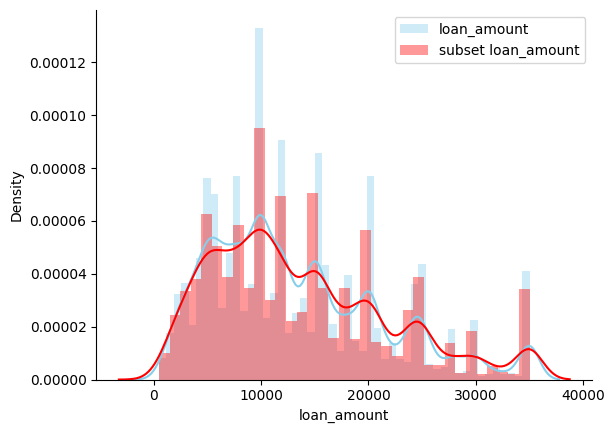

In [237]:


sns.distplot(df.loan_amount, color='skyblue',label = 'loan_amount')

sns.distplot(df.loan_amount[potential_total_charged_off_index_list],color='red',label = 'subset loan_amount')

plt.legend()
plt.show()





<ipython-input-236-32c599854c26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.funded_amount, color='skyblue',label = 'funded_amount')
<ipython-input-236-32c599854c26>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.funded_amount[potential_total_charged_off_index_list],color='red',labe

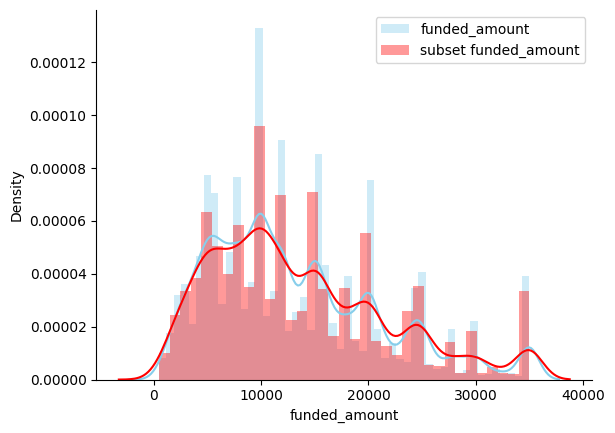

In [236]:


sns.distplot(df.funded_amount, color='skyblue',label = 'funded_amount')

sns.distplot(df.funded_amount[potential_total_charged_off_index_list],color='red',label = 'subset funded_amount')

plt.legend()
plt.show()



<ipython-input-235-9ba8a1b3090a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.term, color='skyblue',label = 'term')
<ipython-input-235-9ba8a1b3090a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.term[potential_total_charged_off_index_list],color='red',label = 'subset term')


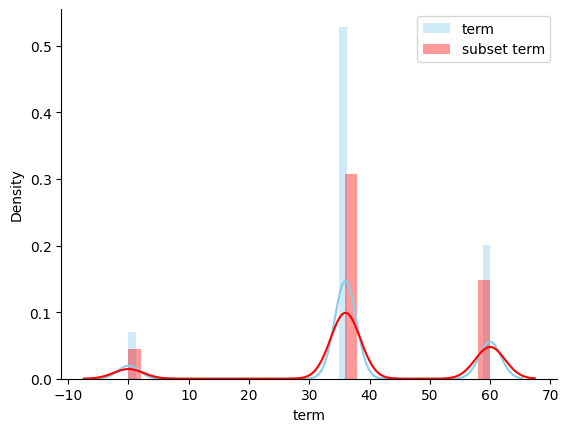

In [235]:
sns.distplot(df.term, color='skyblue',label = 'term')

sns.distplot(df.term[potential_total_charged_off_index_list],color='red',label = 'subset term')

plt.legend()
plt.show()

<ipython-input-234-c5fa28eb007a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.int_rate, color='skyblue',label = 'int_rate')
<ipython-input-234-c5fa28eb007a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.int_rate[potential_total_charged_off_index_list],color='red',label = 'subset int

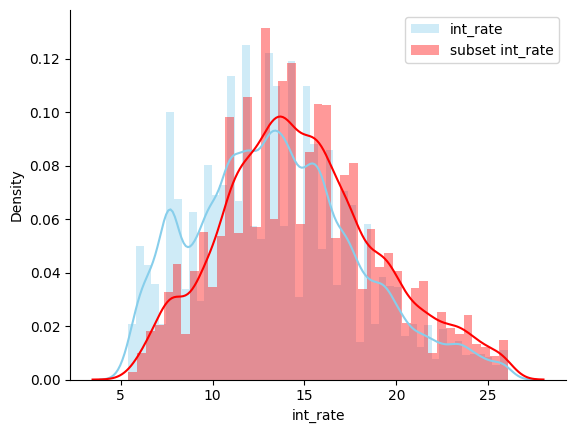

In [234]:
sns.distplot(df.int_rate, color='skyblue',label = 'int_rate')

sns.distplot(df.int_rate[potential_total_charged_off_index_list],color='red',label = 'subset int_rate')

plt.legend()
plt.show()

The distributino of interest rates for the whoel set is different to the risky subset. This coudl be a good indicator.

<ipython-input-238-cda68fc1f54c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.instalment, color='skyblue',label = 'instalment')
<ipython-input-238-cda68fc1f54c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.instalment[potential_total_charged_off_index_list],color='red',label = 'subs

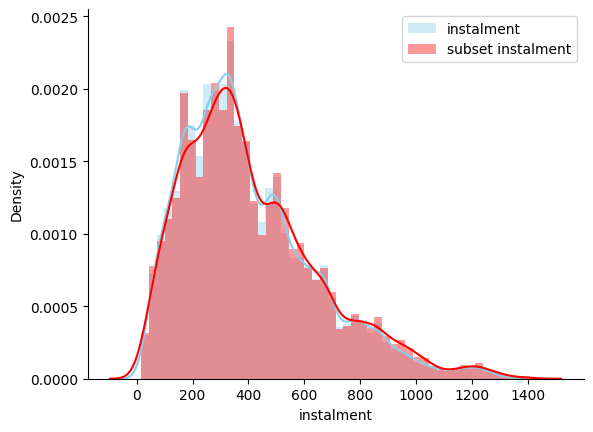

In [238]:
sns.distplot(df.instalment, color='skyblue',label = 'instalment')

sns.distplot(df.instalment[potential_total_charged_off_index_list],color='red',label = 'subset instalment')

plt.legend()
plt.show()

<ipython-input-241-65917d1271d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.annual_inc, color='skyblue',label = 'annual_inc')
<ipython-input-241-65917d1271d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.annual_inc[potential_total_charged_off_index_list],color='red',label = 'subs

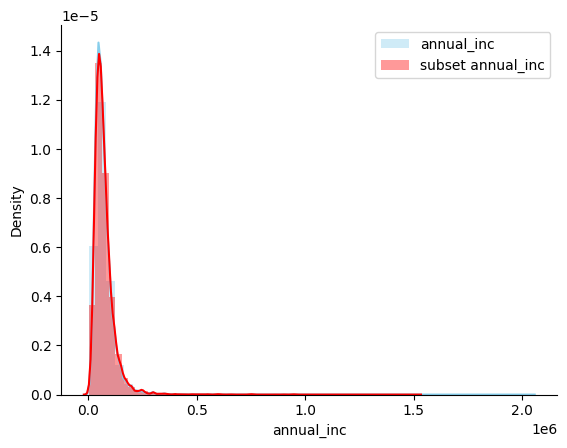

In [241]:
sns.distplot(df.annual_inc, color='skyblue',label = 'annual_inc')

sns.distplot(df.annual_inc[potential_total_charged_off_index_list],color='red',label = 'subset annual_inc')

plt.legend()
plt.show()

<ipython-input-243-4152130cd79e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.dti, color='skyblue',label = 'dti')
<ipython-input-243-4152130cd79e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.dti[potential_total_charged_off_index_list],color='red',label = 'subset dti')


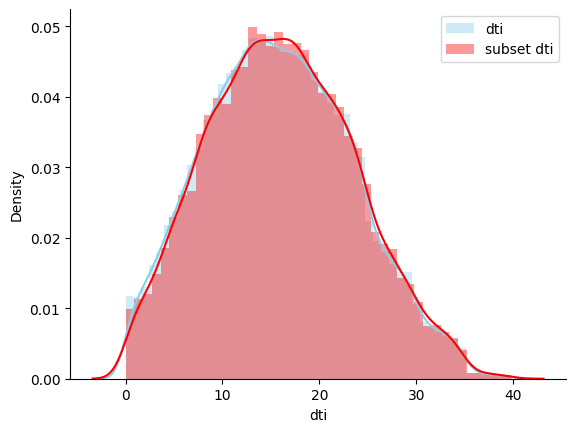

In [243]:
sns.distplot(df.dti, color='skyblue',label = 'dti')

sns.distplot(df.dti[potential_total_charged_off_index_list],color='red',label = 'subset dti')

plt.legend()
plt.show()

<ipython-input-245-841c387c65f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.delinq_2yrs, color='skyblue',label = 'delinq_2yrs')
<ipython-input-245-841c387c65f9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.delinq_2yrs[potential_total_charged_off_index_list],color='red',label = 's

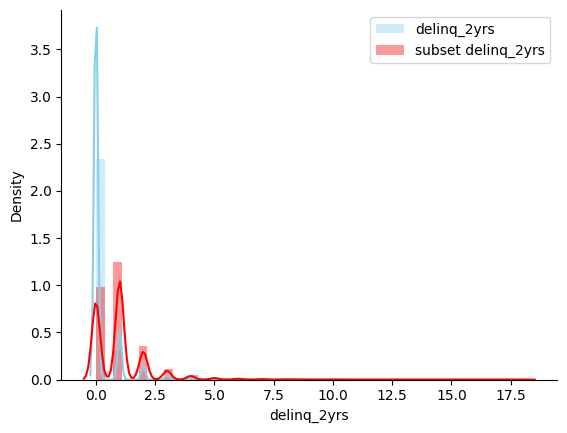

In [245]:
sns.distplot(df.delinq_2yrs, color='skyblue',label = 'delinq_2yrs')

sns.distplot(df.delinq_2yrs[potential_total_charged_off_index_list],color='red',label = 'subset delinq_2yrs')

plt.legend()
plt.show()

The distributino of the nubmer of 30+ days past-due payments for the whoel set is different to the risky subset. This coudl be a good indicator.

<ipython-input-246-762b162e3bbe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.inq_last_6mths, color='skyblue',label = 'inq_last_6mths')
<ipython-input-246-762b162e3bbe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.inq_last_6mths[potential_total_charged_off_index_list],color='red',l

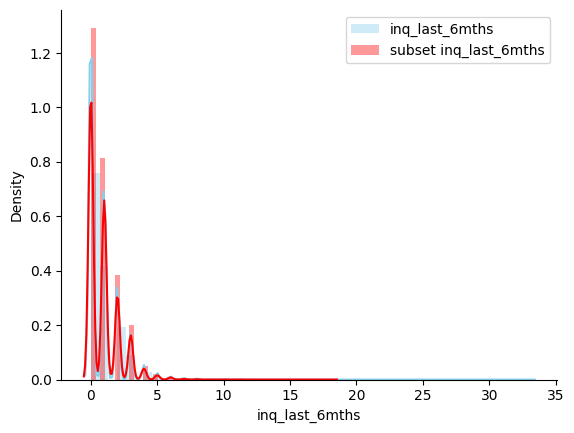

In [246]:
sns.distplot(df.inq_last_6mths, color='skyblue',label = 'inq_last_6mths')

sns.distplot(df.inq_last_6mths[potential_total_charged_off_index_list],color='red',label = 'subset inq_last_6mths')

plt.legend()
plt.show()

<ipython-input-244-175170573ab2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mths_since_last_record, color='skyblue',label = 'mths_since_last_record')
<ipython-input-244-175170573ab2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mths_since_last_record[potential_total_charged_off_i

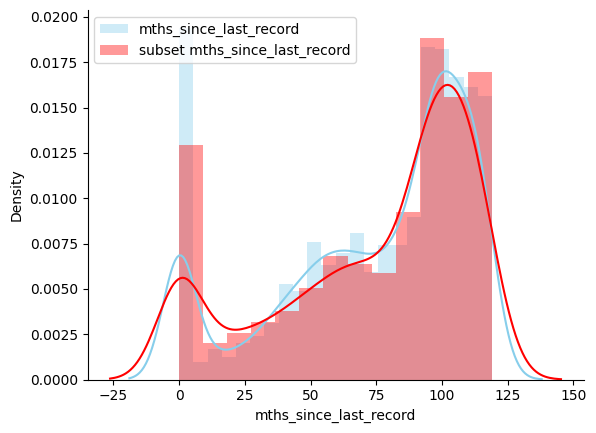

In [244]:
sns.distplot(df.mths_since_last_record, color='skyblue',label = 'mths_since_last_record')

sns.distplot(df.mths_since_last_record[potential_total_charged_off_index_list],color='red',label = 'subset mths_since_last_record')

plt.legend()
plt.show()

<ipython-input-247-9381c2e90af1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.open_accounts, color='skyblue',label = 'open_accounts')
<ipython-input-247-9381c2e90af1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.open_accounts[potential_total_charged_off_index_list],color='red',labe

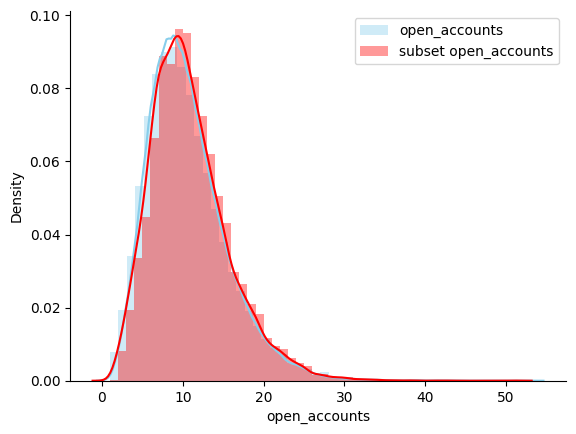

In [247]:
sns.distplot(df.open_accounts, color='skyblue',label = 'open_accounts')

sns.distplot(df.open_accounts[potential_total_charged_off_index_list],color='red',label = 'subset open_accounts')

plt.legend()
plt.show()

<ipython-input-248-e8d0dd311597>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_accounts, color='skyblue',label = 'total_accounts')
<ipython-input-248-e8d0dd311597>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_accounts[potential_total_charged_off_index_list],color='red',l

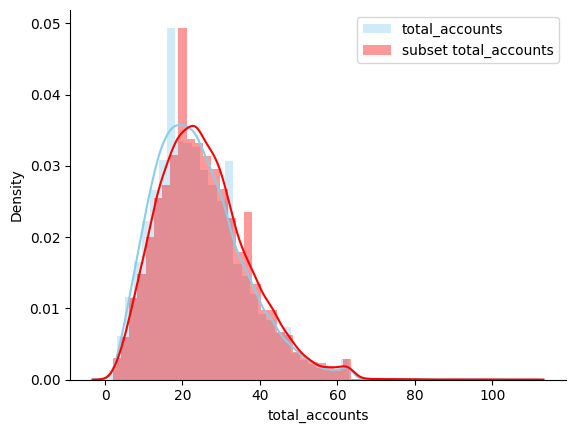

In [248]:
sns.distplot(df.total_accounts, color='skyblue',label = 'total_accounts')

sns.distplot(df.total_accounts[potential_total_charged_off_index_list],color='red',label = 'subset total_accounts')

plt.legend()
plt.show()

The distribution of the total number of accounts for the whole set is different to the risky subset. This could be be a good indicator of risk.

<ipython-input-249-071c5e3ddd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.out_prncp, color='skyblue',label = 'out_prncp')
<ipython-input-249-071c5e3ddd5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.out_prncp[potential_total_charged_off_index_list],color='red',label = 'subset 

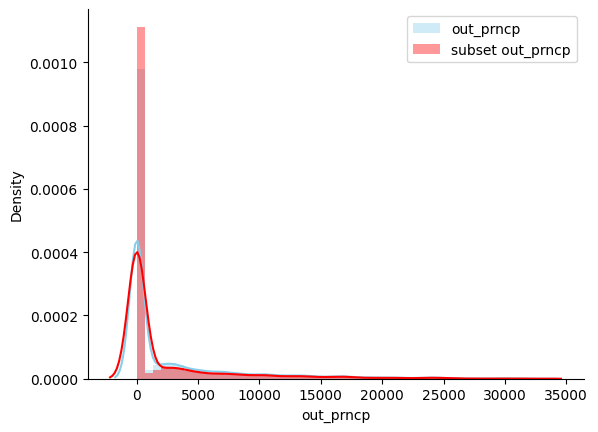

In [249]:
sns.distplot(df.out_prncp, color='skyblue',label = 'out_prncp')

sns.distplot(df.out_prncp[potential_total_charged_off_index_list],color='red',label = 'subset out_prncp')

plt.legend()
plt.show()

<ipython-input-250-8c3a00fa1448>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment, color='skyblue',label = 'total_payment')
<ipython-input-250-8c3a00fa1448>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment[potential_total_charged_off_index_list],color='red',labe

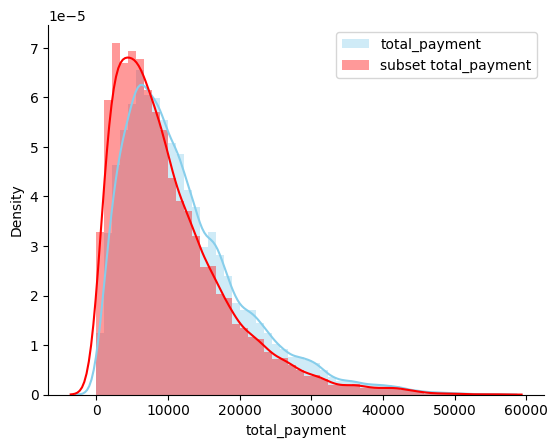

In [250]:
sns.distplot(df.total_payment, color='skyblue',label = 'total_payment')

sns.distplot(df.total_payment[potential_total_charged_off_index_list],color='red',label = 'subset total_payment')

plt.legend()
plt.show()

The payments received to date in the subset is less on average than the whole set. The distribution of the payments received for the whole set is different to the risky subset. This could be be a good indicator of risk.

<ipython-input-258-c188321e4b3d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment_inv, color='skyblue',label = 'total_payment_inv')
<ipython-input-258-c188321e4b3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment_inv[potential_total_charged_off_index_list],colo

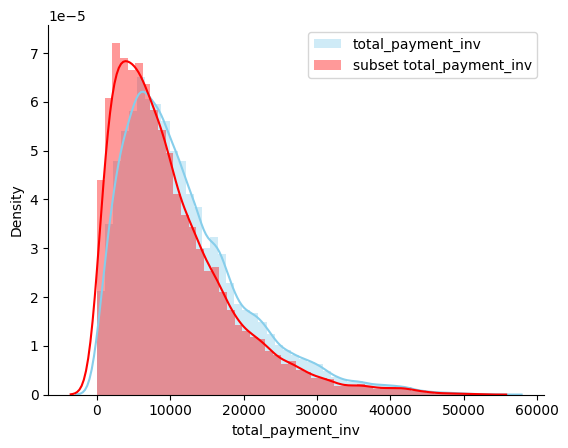

In [258]:
sns.distplot(df.total_payment_inv, color='skyblue',label = 'total_payment_inv')

sns.distplot(df.total_payment_inv[potential_total_charged_off_index_list],color='red',label = 'subset total_payment_inv')

plt.legend()
plt.show()

The distributino of payments received to date for money commtied by investors for the whoel set is different to the risky subset. This coudl be a good indicator.

<ipython-input-251-94ed72e7bf8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_int, color='skyblue',label = 'total_rec_int')
<ipython-input-251-94ed72e7bf8e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_int[potential_total_charged_off_index_list],color='red',labe

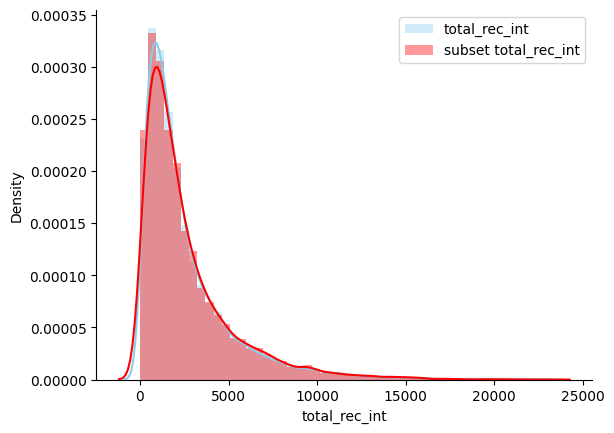

In [251]:
sns.distplot(df.total_rec_int, color='skyblue',label = 'total_rec_int')

sns.distplot(df.total_rec_int[potential_total_charged_off_index_list],color='red',label = 'subset total_rec_int')

plt.legend()
plt.show()

<ipython-input-252-54c6e60c82f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_late_fee, color='skyblue',label = 'total_rec_late_fee')
<ipython-input-252-54c6e60c82f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_late_fee[potential_total_charged_off_index_list],c

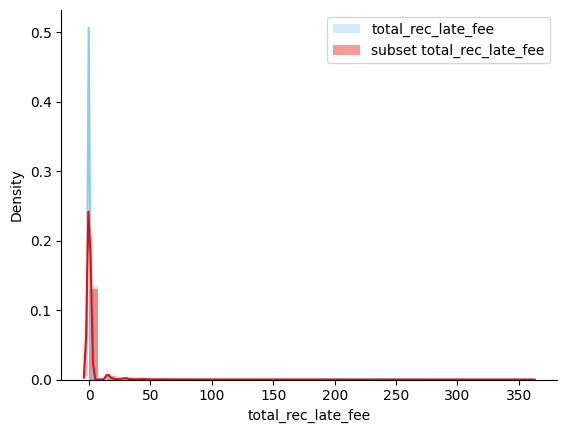

In [252]:
sns.distplot(df.total_rec_late_fee, color='skyblue',label = 'total_rec_late_fee')

sns.distplot(df.total_rec_late_fee[potential_total_charged_off_index_list],color='red',label = 'subset total_rec_late_fee')

plt.legend()
plt.show()

The distribution of the total received late fees for the whole set is different to the risky subset. This could be be a good indicator of risk.

<ipython-input-256-3852c446bd26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.last_payment_amount, color='skyblue',label = 'last_payment_amount')
<ipython-input-256-3852c446bd26>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.last_payment_amount[potential_total_charged_off_index_list

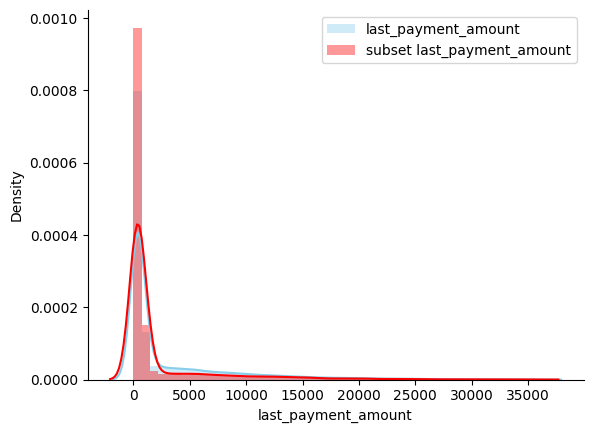

In [256]:
sns.distplot(df.last_payment_amount, color='skyblue',label = 'last_payment_amount')

sns.distplot(df.last_payment_amount[potential_total_charged_off_index_list],color='red',label = 'subset last_payment_amount')

plt.legend()
plt.show()

<ipython-input-257-bc3ac05b1ec0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_prncp, color='skyblue',label = 'total_rec_prncp')
<ipython-input-257-bc3ac05b1ec0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_prncp[potential_total_charged_off_index_list],color='red

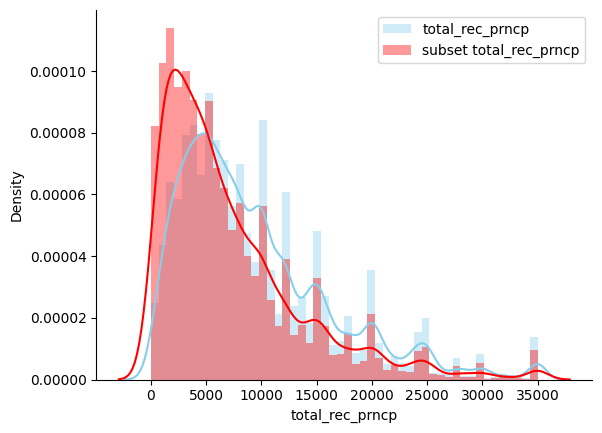

In [257]:
sns.distplot(df.total_rec_prncp, color='skyblue',label = 'total_rec_prncp')

sns.distplot(df.total_rec_prncp[potential_total_charged_off_index_list],color='red',label = 'subset total_rec_prncp')

plt.legend()
plt.show()

The total amount of the principal received to date in the subset is less on average than the whole set. The distribution of the total amount of the principal received to date for the whole set is different to the risky subset. This could be be a good indicator of risk.

<ipython-input-260-06c55adc5f71>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.collections_12_mths_ex_med, color='skyblue',label = 'collections_12_mths_ex_med')
<ipython-input-260-06c55adc5f71>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.collections_12_mths_ex_med[potential_total_c

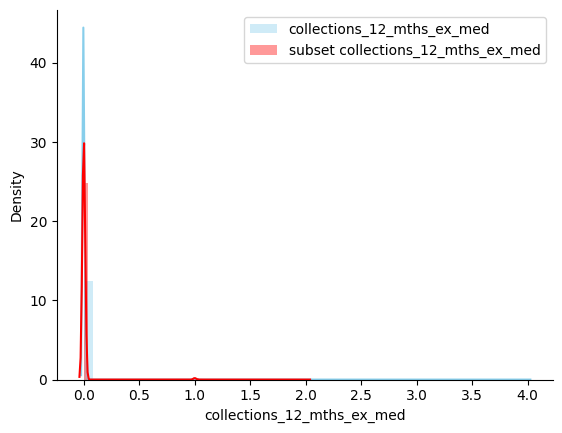

In [260]:
sns.distplot(df.collections_12_mths_ex_med, color='skyblue',label = 'collections_12_mths_ex_med')

sns.distplot(df.collections_12_mths_ex_med[potential_total_charged_off_index_list],color='red',label = 'subset collections_12_mths_ex_med')

plt.legend()
plt.show()

<ipython-input-261-0134a0ac6d17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mths_since_last_major_derog, color='skyblue',label = 'mths_since_last_major_derog')
<ipython-input-261-0134a0ac6d17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mths_since_last_major_derog[potential_tota

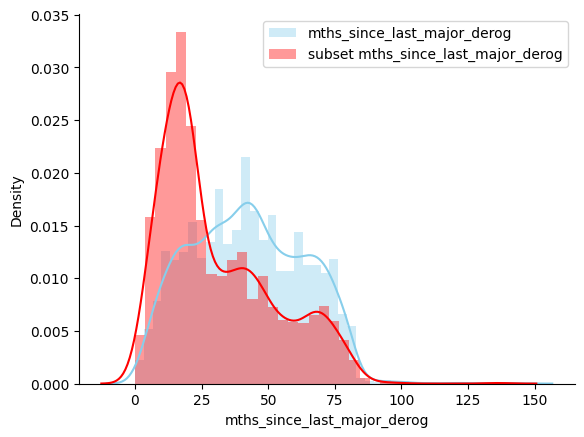

In [261]:
sns.distplot(df.mths_since_last_major_derog, color='skyblue',label = 'mths_since_last_major_derog')

sns.distplot(df.mths_since_last_major_derog[potential_total_charged_off_index_list],color='red',label = 'subset mths_since_last_major_derog')

plt.legend()
plt.show()

The amount of months since the most-recent 90-day or worse rating in the subset is less on average than the whole set. The distribution of the amount of months since the most-recent 90-day or worse rating  for the whole set is different to the risky subset. This could be be a good indicator of risk.

Does the grade of the loan have effect on customers not paying?

FOr categorical data, we set up a dataframe column of the risk subset, so that we can indicate by hue what is in the subset or not:

In [342]:


df['subset'] = False

df.loc[potential_total_charged_off_index_list, 'subset'] = True



<Axes: xlabel='grade', ylabel='count'>

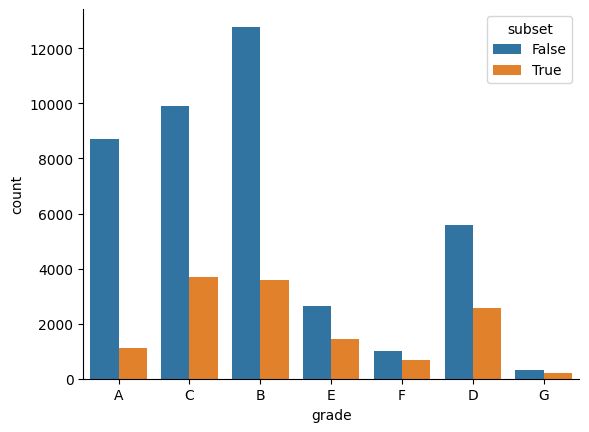

In [341]:
sns.countplot(df, x='grade', hue='subset')
#  !pip install seaborn==0.13.0 to use stat='percent' to make every column into a percentage of the whole

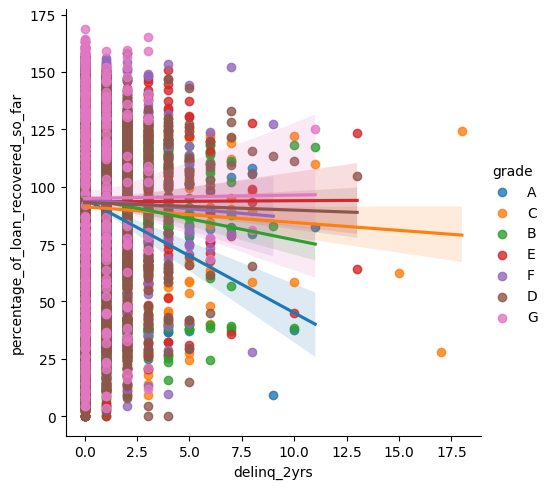

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'grade')

Apparnetly not.

Is the purpose for the loan likely to have an effect?

<Axes: xlabel='count', ylabel='purpose'>

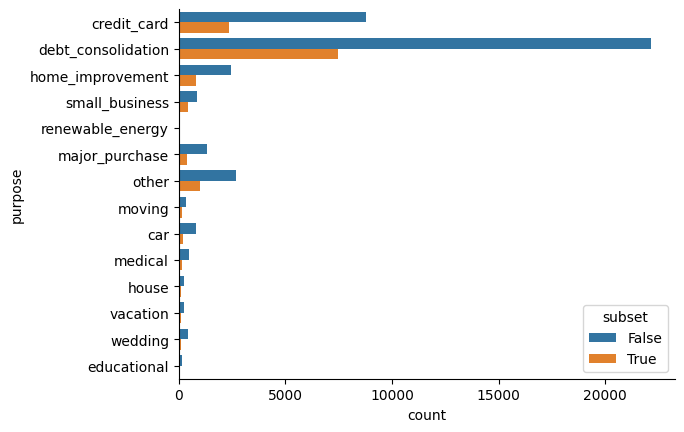

In [354]:
sns.countplot(df, y='purpose', hue='subset')
#  !pip install seaborn==0.13.0 to use stat='percent' to make every column into a percentage of the whole

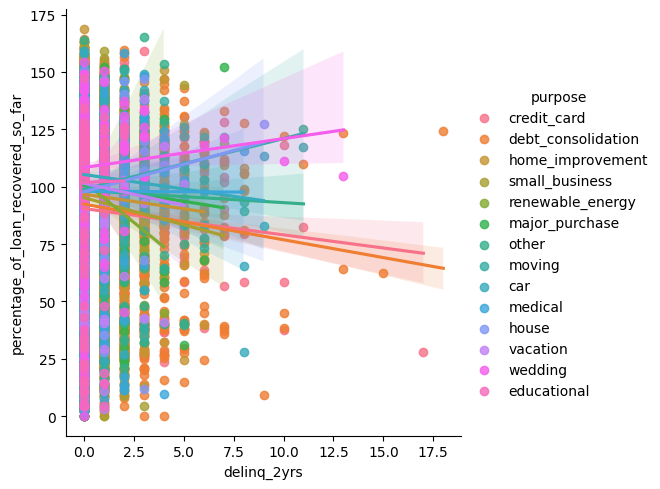

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'purpose')

YEs, credit card purpose and debt consolidatino purpose appear to lead to late payments and nto recoverign 100% of the loan.

Does the home_ownership value contribute to the likelihood a customer won't pay?

<Axes: xlabel='home_ownership', ylabel='count'>

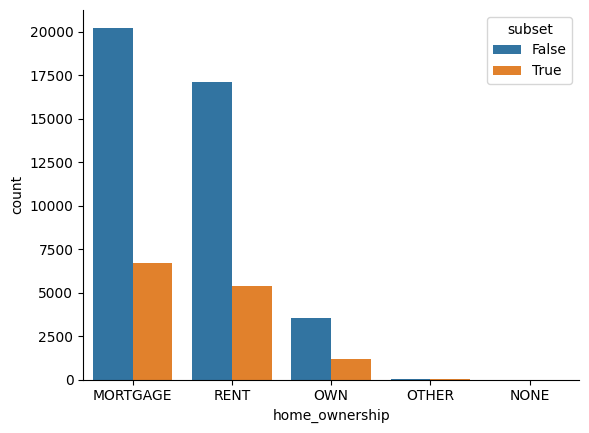

In [355]:
sns.countplot(df, x='home_ownership', hue='subset')
#  !pip install seaborn==0.13.0 to use stat='percent' to make every column into a percentage of the whole

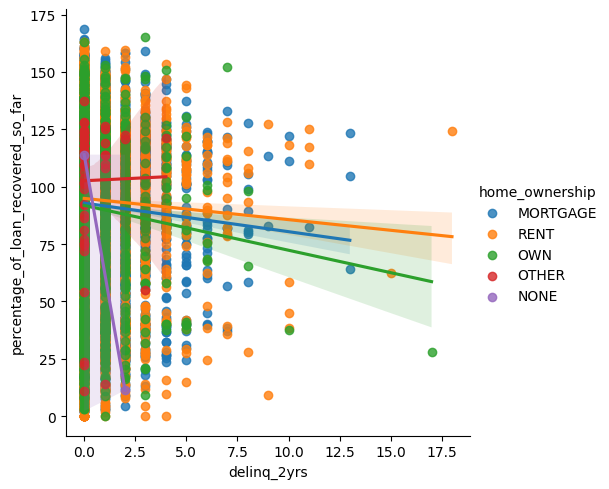

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'home_ownership')

No, unless you have 'none' - no home, which leads to unpredictableness, one loan was 115% recovered, and the other loan onl has 20% paid-off.

<Axes: xlabel='term', ylabel='count'>

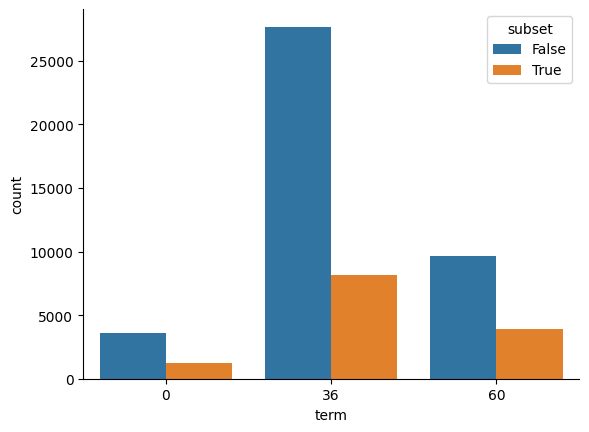

In [356]:
sns.countplot(df, x='term', hue='subset')

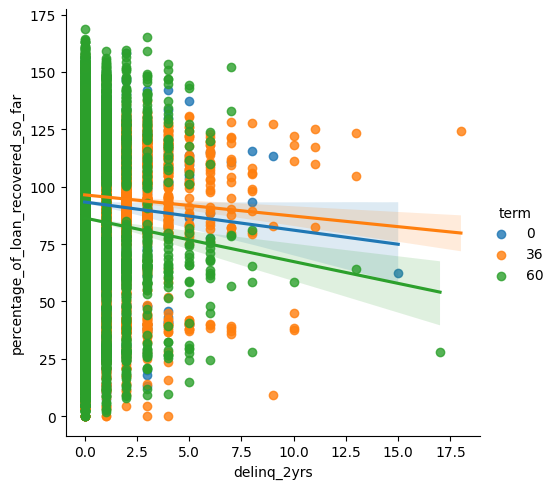

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'term')

60 month terms lead to less of the loan recovered and more past-due payments.

<Axes: xlabel='count', ylabel='sub_grade'>

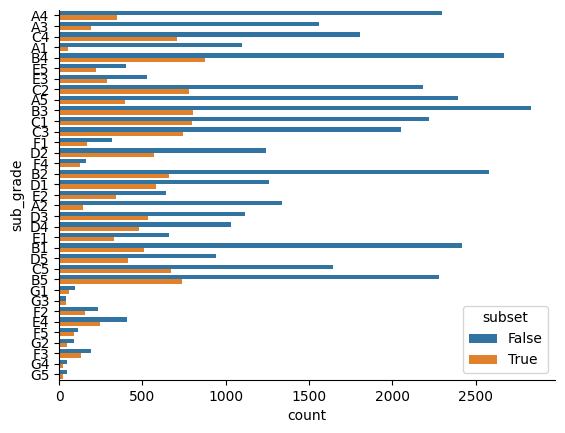

In [357]:
sns.countplot(df, y='sub_grade', hue='subset')

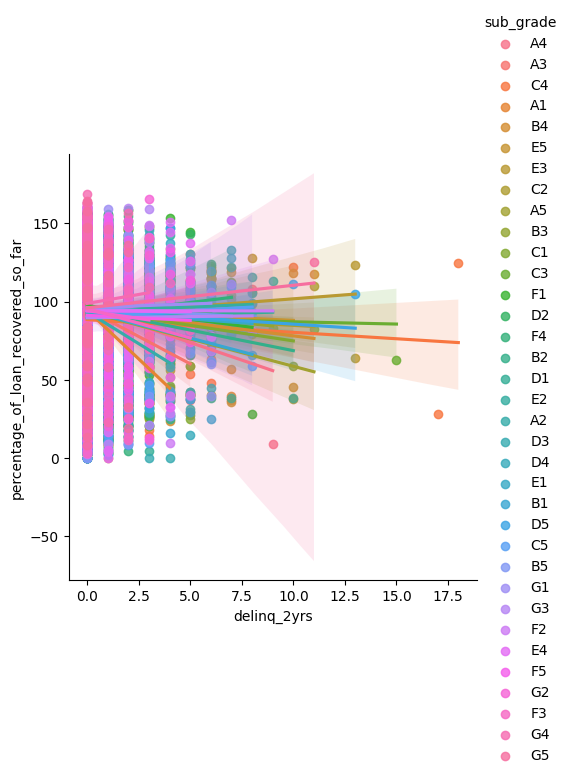

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'sub_grade')

<Axes: xlabel='count', ylabel='employment_length'>

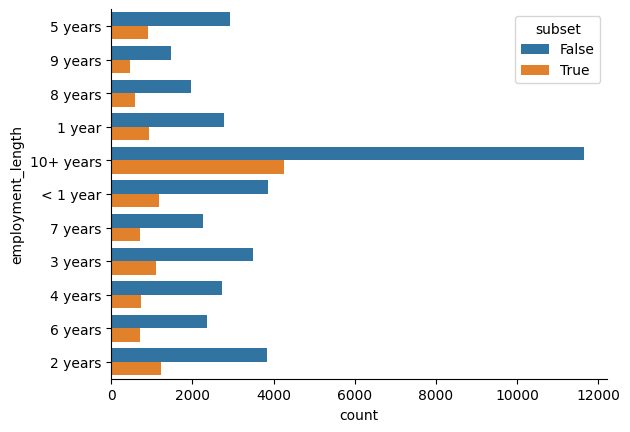

In [358]:
sns.countplot(df, y='employment_length', hue='subset')

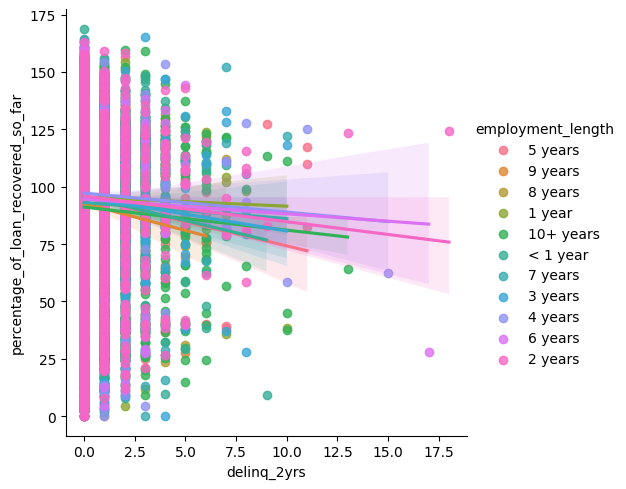

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'employment_length')

<Axes: xlabel='verification_status', ylabel='count'>

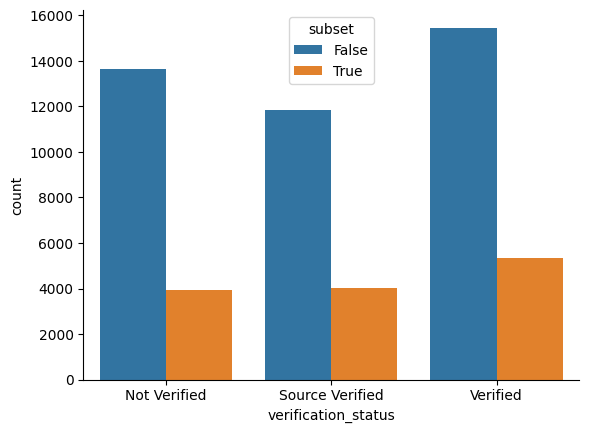

In [361]:
sns.countplot(df, x='verification_status', hue='subset')

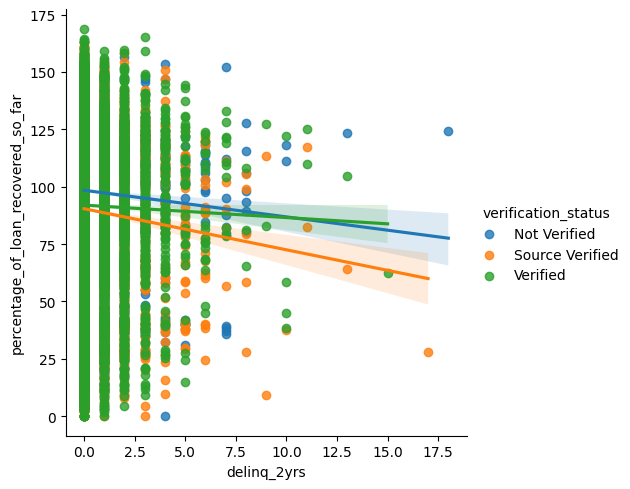

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'verification_status')

<Axes: xlabel='count', ylabel='loan_status'>

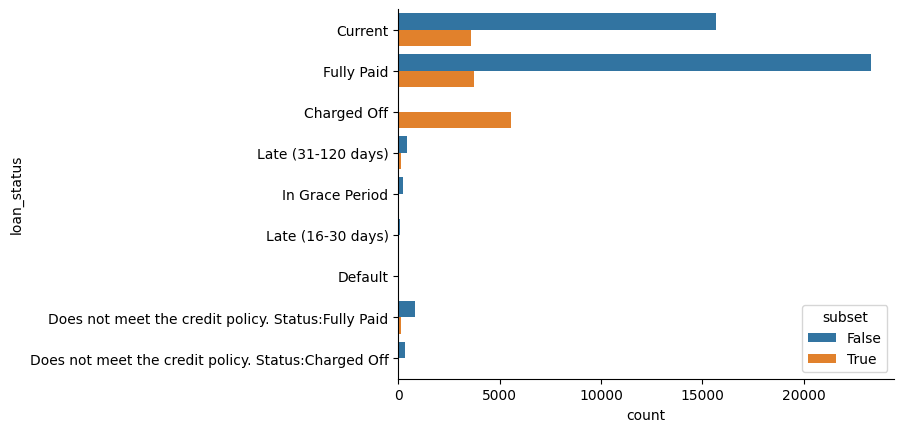

In [363]:
sns.countplot(df, y='loan_status', hue='subset')

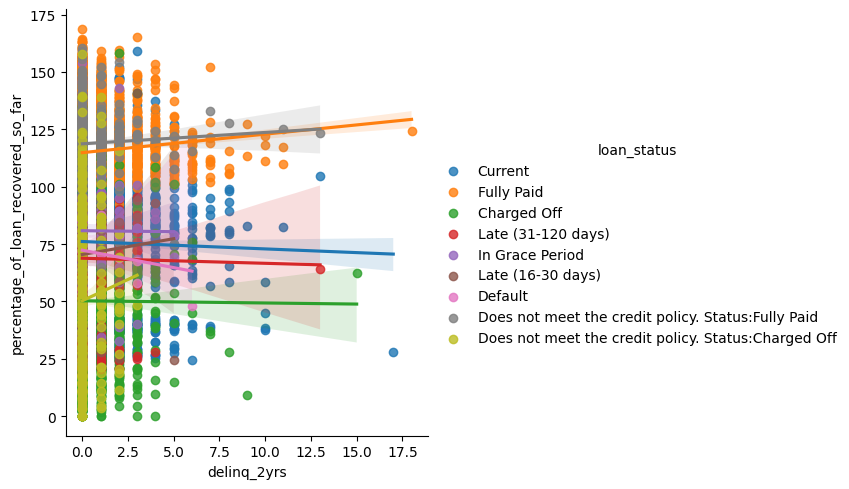

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'loan_status')

<Axes: xlabel='count', ylabel='inq_last_6mths'>

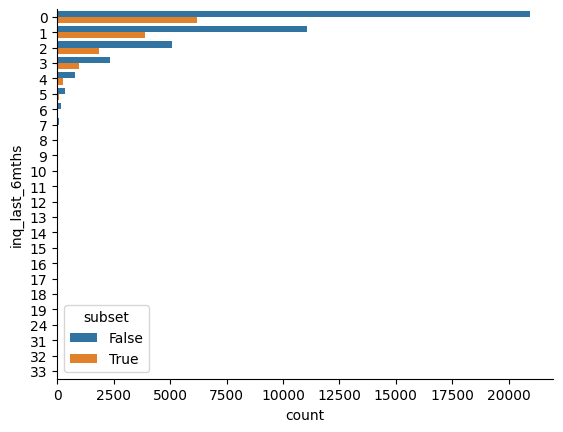

In [366]:
sns.countplot(df, y='inq_last_6mths', hue='subset')

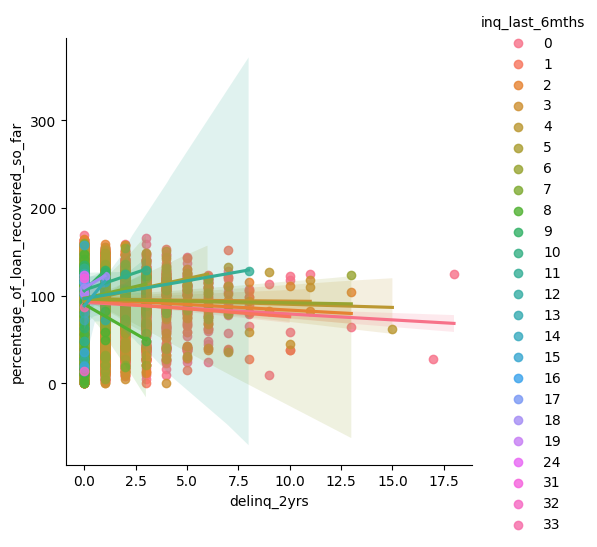

In [ ]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'inq_last_6mths')

<Axes: xlabel='count', ylabel='open_accounts'>

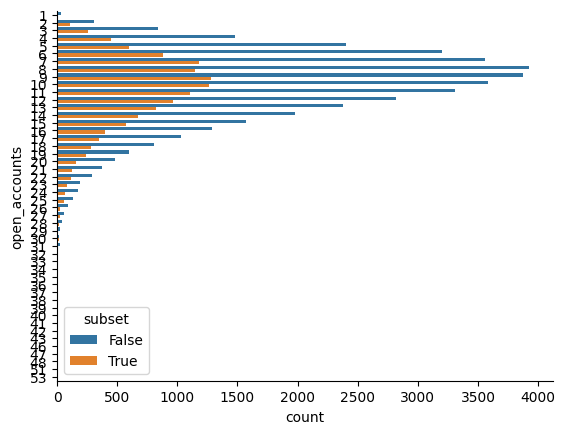

In [368]:
sns.countplot(df, y='open_accounts', hue='subset')

We have inedtified by comparign ditrubtiosn that these columns seem to be good indicators of loss:



*   int_rate
*  delinq_2yrs
*total_accounts
*total_payment
*total_payment_inv
*total_rec_late_fee
*total_rec_prncp
*mths_since_last_major_derog

We should compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".

We create another dataframe column so we can easily see the subsets visualised by hue:

In [428]:
df['riskiness'] = 'Minimal risk'

df.loc[late_payers_index_list, 'riskiness'] = 'late_payers'


df.loc[charged_off_index_list, 'riskiness'] = 'charged_off'


We now compare the distributions for our suspected good indicators of loss between late_payers and loans that are alredy cahrged-off:

<Axes: xlabel='riskiness', ylabel='int_rate'>

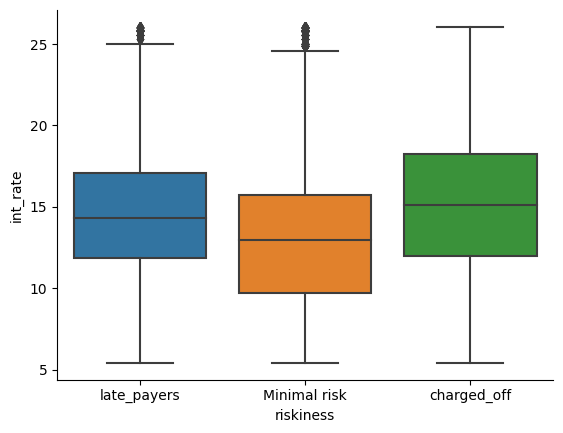

In [429]:
sns.boxplot(df, y='int_rate', x='riskiness')



<ipython-input-430-aadb656c05d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.int_rate,color='green',label = 'minimal_risk')
<ipython-input-430-aadb656c05d4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.int_rate[late_payers_index_list],color='orange',label = 'late_payers subset int

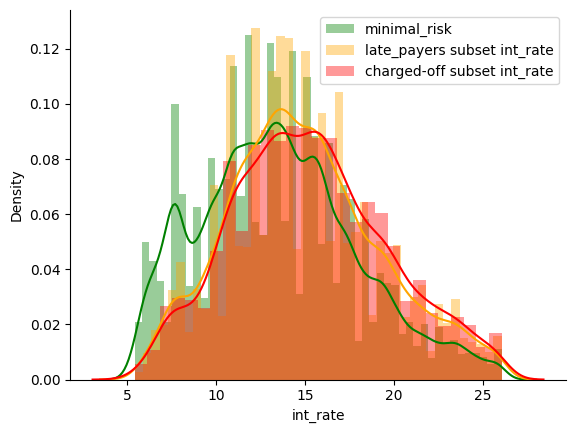

In [430]:
sns.distplot(df.int_rate,color='green',label = 'minimal_risk')

sns.distplot(df.int_rate[late_payers_index_list],color='orange',label = 'late_payers subset int_rate')

sns.distplot(df.int_rate[charged_off_index_list],color='red',label = 'charged-off subset int_rate')

plt.legend()
plt.show()

The similar distributions for the late-payers and the charged-off loans mean that this factor applies to loans which have the potential to change to "Charged Off".

<Axes: xlabel='riskiness', ylabel='delinq_2yrs'>

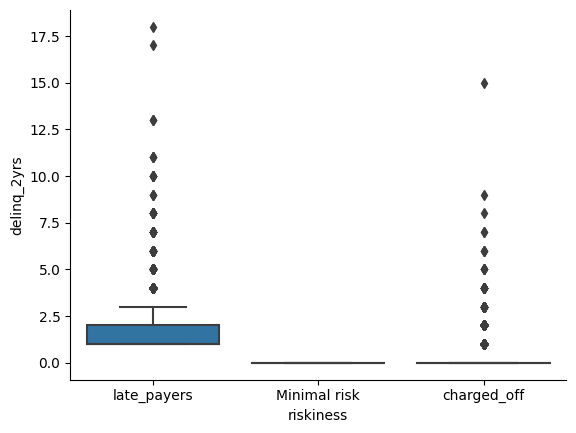

In [431]:
sns.boxplot(df, y='delinq_2yrs', x='riskiness')


<ipython-input-432-7dbf0509e7a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.delinq_2yrs,color='green',label = 'minimal_risk')
<ipython-input-432-7dbf0509e7a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.delinq_2yrs[late_payers_index_list],color='orange',label = 'late_payers subs

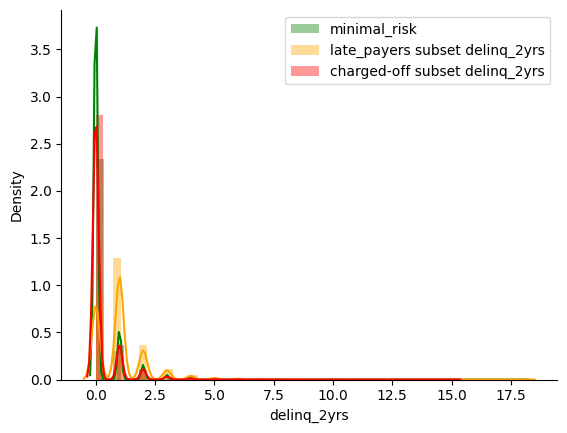

In [432]:
sns.distplot(df.delinq_2yrs,color='green',label = 'minimal_risk')

sns.distplot(df.delinq_2yrs[late_payers_index_list],color='orange',label = 'late_payers subset delinq_2yrs')

sns.distplot(df.delinq_2yrs[charged_off_index_list],color='red',label = 'charged-off subset delinq_2yrs')

plt.legend()
plt.show()

This is nto a claer indicator of loss.

<Axes: xlabel='riskiness', ylabel='total_accounts'>

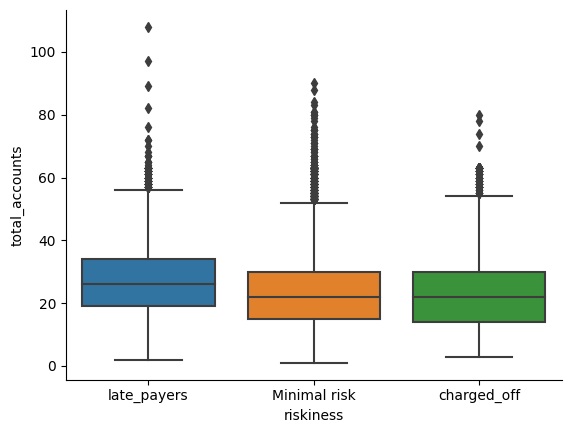

In [433]:
sns.boxplot(df, y='total_accounts', x='riskiness')


<ipython-input-434-d6aa2026b8c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_accounts,color='green',label = 'minimal_risk')
<ipython-input-434-d6aa2026b8c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_accounts[late_payers_index_list],color='orange',label = 'late_payer

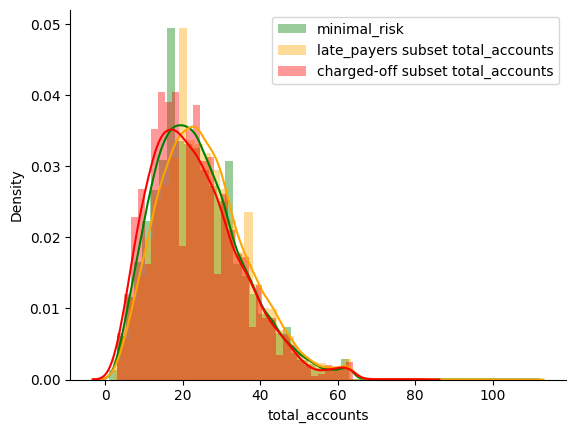

In [434]:
sns.distplot(df.total_accounts,color='green',label = 'minimal_risk')

sns.distplot(df.total_accounts[late_payers_index_list],color='orange',label = 'late_payers subset total_accounts')

sns.distplot(df.total_accounts[charged_off_index_list],color='red',label = 'charged-off subset total_accounts')

plt.legend()
plt.show()

This is nto a claer indicator of loss: the distributions of the late-payers and the cahrged-off laosn are on opposite sides of the distrubtion of 'minimal risk'!

<Axes: xlabel='riskiness', ylabel='total_payment'>

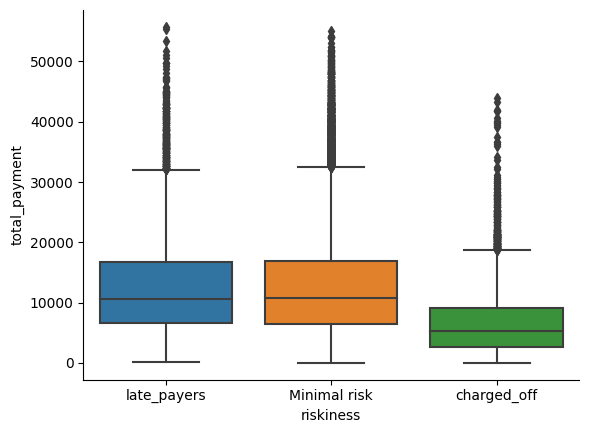

In [435]:
sns.boxplot(df, y='total_payment', x='riskiness')


<ipython-input-436-1d8aefdd6744>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment,color='green',label = 'minimal_risk')
<ipython-input-436-1d8aefdd6744>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment[late_payers_index_list],color='orange',label = 'late_payers 

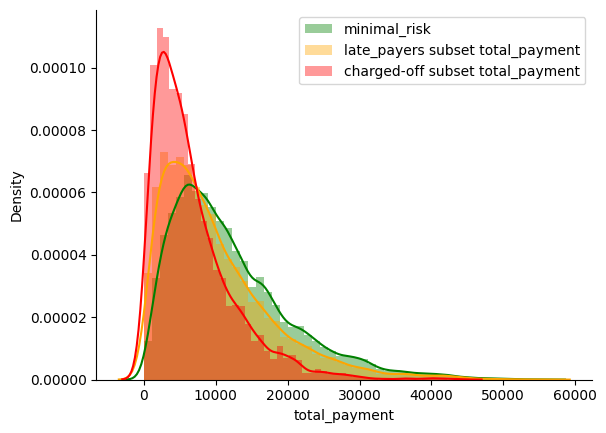

In [436]:
sns.distplot(df.total_payment,color='green',label = 'minimal_risk')

sns.distplot(df.total_payment[late_payers_index_list],color='orange',label = 'late_payers subset total_payment')

sns.distplot(df.total_payment[charged_off_index_list],color='red',label = 'charged-off subset total_payment')

plt.legend()
plt.show()

The similar distributions for the late-payers and the charged-off loans and their shared positively-skewed deviatino fro mthe minimal_risk subset's distribtuion mean that this factor applies to loans which have the potential to change to "Charged Off".

<Axes: xlabel='riskiness', ylabel='total_payment_inv'>

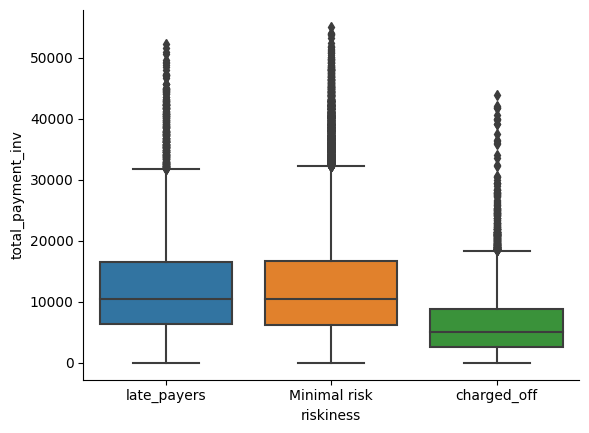

In [437]:
sns.boxplot(df, y='total_payment_inv', x='riskiness')

<ipython-input-438-f4400f82265f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment_inv,color='green',label = 'minimal_risk')
<ipython-input-438-f4400f82265f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_payment_inv[late_payers_index_list],color='orange',label = 'late

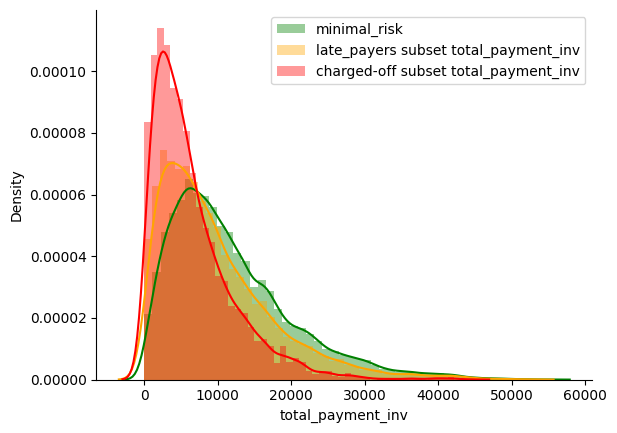

In [438]:
sns.distplot(df.total_payment_inv,color='green',label = 'minimal_risk')

sns.distplot(df.total_payment_inv[late_payers_index_list],color='orange',label = 'late_payers subset total_payment_inv')

sns.distplot(df.total_payment_inv[charged_off_index_list],color='red',label = 'charged-off subset total_payment_inv')

plt.legend()
plt.show()

The similar distributions for the late-payers and the charged-off loans and their shared positively-skewed deviatino fro mthe minimal_risk subset's distribtuion mean that this factor applies to loans which have the potential to change to "Charged Off".

<Axes: xlabel='riskiness', ylabel='total_rec_late_fee'>

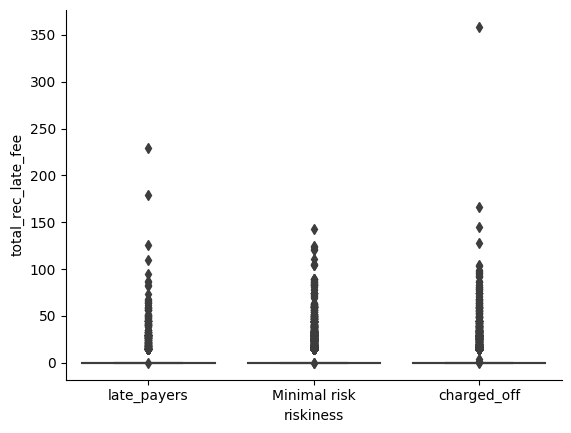

In [439]:
sns.boxplot(df, y='total_rec_late_fee', x='riskiness')

<ipython-input-440-b9b61bd905bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_late_fee,color='green',label = 'minimal_risk')
<ipython-input-440-b9b61bd905bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_late_fee[late_payers_index_list],color='orange',label = 'la

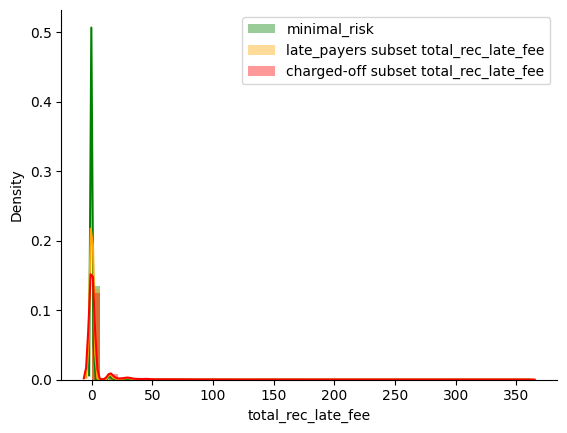

In [440]:
sns.distplot(df.total_rec_late_fee,color='green',label = 'minimal_risk')

sns.distplot(df.total_rec_late_fee[late_payers_index_list],color='orange',label = 'late_payers subset total_rec_late_fee')

sns.distplot(df.total_rec_late_fee[charged_off_index_list],color='red',label = 'charged-off subset total_rec_late_fee')

plt.legend()
plt.show()

This is not a clear indicator of loss.

<Axes: xlabel='riskiness', ylabel='total_rec_prncp'>

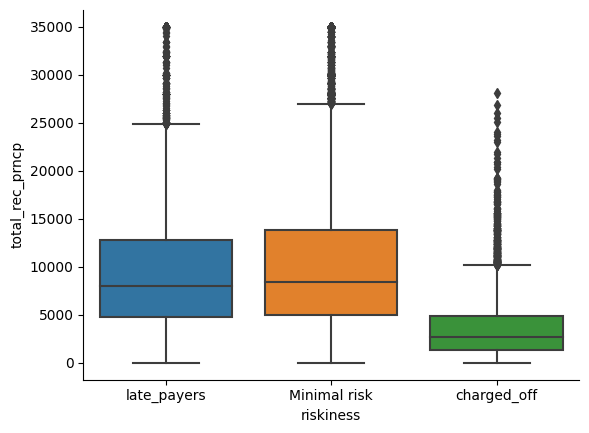

In [441]:
sns.boxplot(df, y='total_rec_prncp', x='riskiness')

<ipython-input-442-61e269205a14>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_prncp,color='green',label = 'minimal_risk')
<ipython-input-442-61e269205a14>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_rec_prncp[late_payers_index_list],color='orange',label = 'late_pay

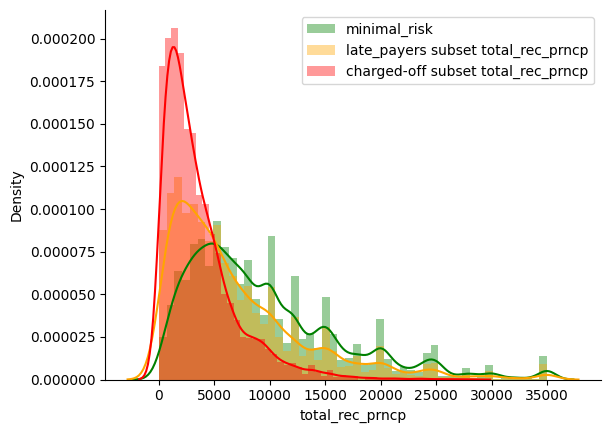

In [442]:
sns.distplot(df.total_rec_prncp,color='green',label = 'minimal_risk')

sns.distplot(df.total_rec_prncp[late_payers_index_list],color='orange',label = 'late_payers subset total_rec_prncp')

sns.distplot(df.total_rec_prncp[charged_off_index_list],color='red',label = 'charged-off subset total_rec_prncp')

plt.legend()
plt.show()

The similar distributions for the late-payers and the charged-off loans and their shared positively-skewed deviatino fro mthe minimal_risk subset's distribtuion mean that this factor applies to loans which have the potential to change to "Charged Off".

<Axes: xlabel='riskiness', ylabel='mths_since_last_major_derog'>

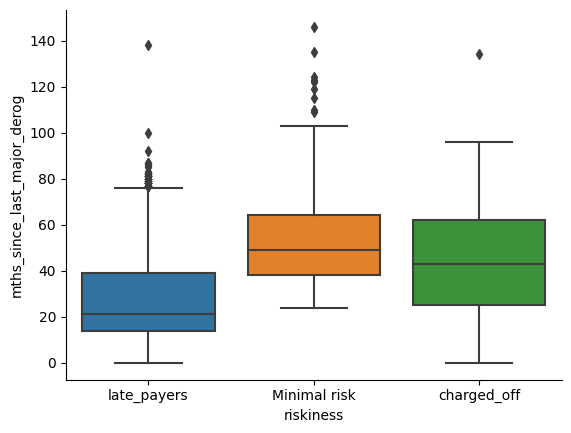

In [443]:
sns.boxplot(df, y='mths_since_last_major_derog', x='riskiness')

<ipython-input-444-470b2a377952>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mths_since_last_major_derog,color='green',label = 'minimal_risk')
<ipython-input-444-470b2a377952>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mths_since_last_major_derog[late_payers_index_list],color='o

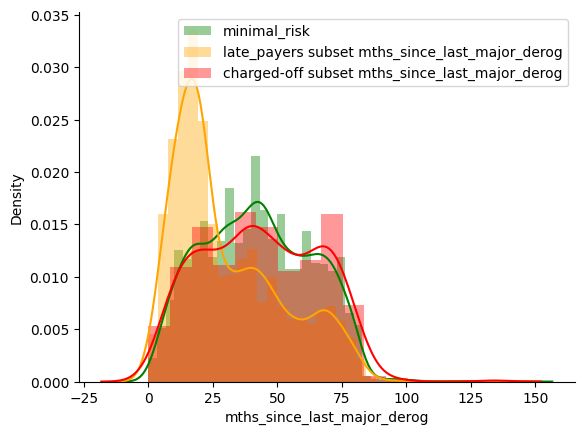

In [444]:
sns.distplot(df.mths_since_last_major_derog,color='green',label = 'minimal_risk')

sns.distplot(df.mths_since_last_major_derog[late_payers_index_list],color='orange',label = 'late_payers subset mths_since_last_major_derog')

sns.distplot(df.mths_since_last_major_derog[charged_off_index_list],color='red',label = 'charged-off subset mths_since_last_major_derog')

plt.legend()
plt.show()

This is ntoa clear indicator of loss because the charge-off loans and the minimal_risk subet are too similar - it is the late-payers who are distinctiv in comaprison, makign this indiciator mont useful for preciting whether a late-payer woudl get charged-off.

In consluion, only some of these factors apply to loans which have the potential to change to "Charged Off":

*int_rate: the interrest rate on the loan
*total_payment: the  payments received to date for total amoutn funded
*total_payment_inv: the  payments received to date for total amoutn committed by investors for that loan at that ponit in time
*total _rec_prncp: the total principal received to date for the amount funded

In [445]:
!git add .

In [446]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   analysis_and_visualisation.ipynb
	modified:   visualing_null_values.png
	modified:   visualising_missing_data.png

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   analysis_and_visualisation.ipynb



In [ ]:
! git